MODÉLISATION - DÉTECTION ANOMALIES FINANCIÈRES
Dataset: Taiwanese Bankruptcy Prediction

1. CHARGEMENT DES DONNÉES
--------------------------------------------------------------------------------
✅ Données avec features sélectionnées chargées
Type de données: selected_features
Dimensions: (6819, 18)

Features: 17
Observations: 6,819

📊 Distribution de la variable cible:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Proportions:
Bankrupt?
0    0.9677
1    0.0323
Name: proportion, dtype: float64

Ratio de déséquilibre: 30.00:1

2. SÉPARATION TRAIN/TEST
--------------------------------------------------------------------------------
✅ Données séparées:
   Train: 5,455 observations (80.0%)
   Test:  1,364 observations (20.0%)

   Distribution Train: {0: np.int64(5279), 1: np.int64(176)}
   Distribution Test:  {0: np.int64(1320), 1: np.int64(44)}

3. TRAITEMENT DU DÉSÉQUILIBRE DES CLASSES
--------------------------------------------------------------------------------

📊 Dataset 

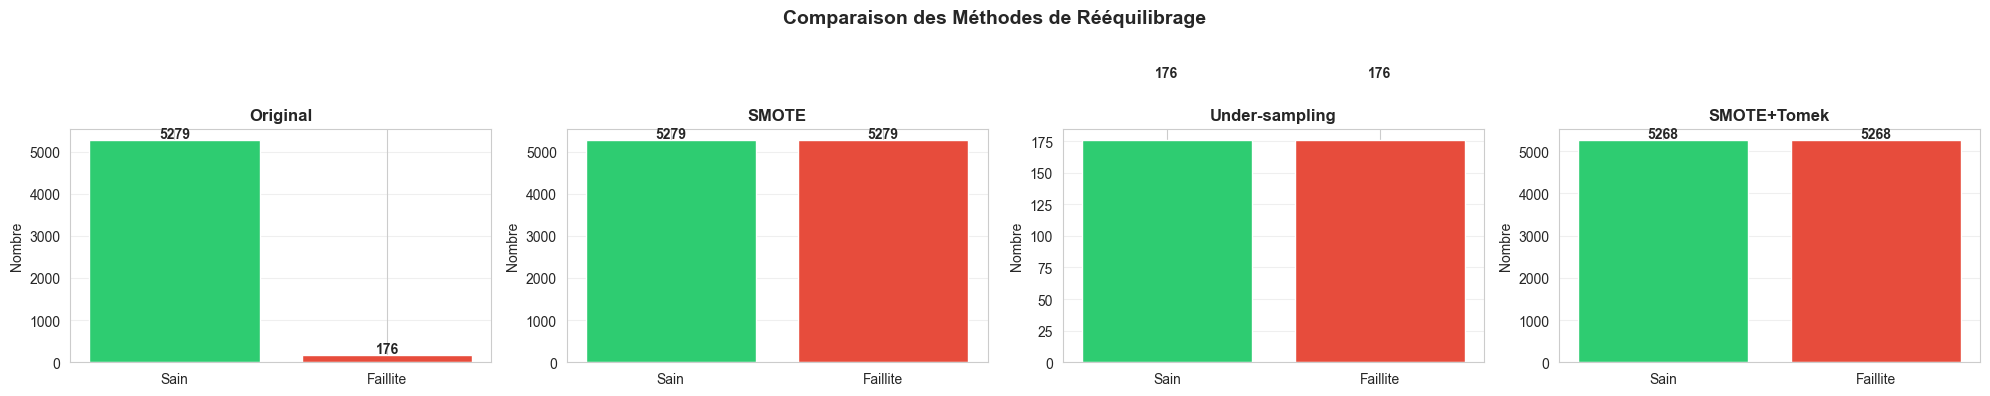


✅ Utilisation de SMOTE pour l'entraînement

4. ENTRAÎNEMENT DES MODÈLES
--------------------------------------------------------------------------------

🔄 Entraînement en cours...

   Entraînement: Logistic Regression... ✓ (AUC: 0.2936)
   Entraînement: Decision Tree... ✓ (AUC: 0.8286)
   Entraînement: Random Forest... ✓ (AUC: 0.9245)
   Entraînement: Gradient Boosting... ✓ (AUC: 0.9305)
   Entraînement: KNN... ✓ (AUC: 0.8550)
   Entraînement: Naive Bayes... ✓ (AUC: 0.8592)
   Entraînement: SVM... ✓ (AUC: 0.5077)

✅ Tous les modèles entraînés avec succès!

5. COMPARAISON DES PERFORMANCES
--------------------------------------------------------------------------------

📊 Performances des modèles (trié par ROC-AUC):

                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Gradient Boosting      0.9032     0.2143  0.7500    0.3333   0.9305
Random Forest          0.9494     0.3457  0.6364    0.4480   0.9245
Naive Bayes            0.0594     0.0332  1.0000    0.0642   0.8592
K

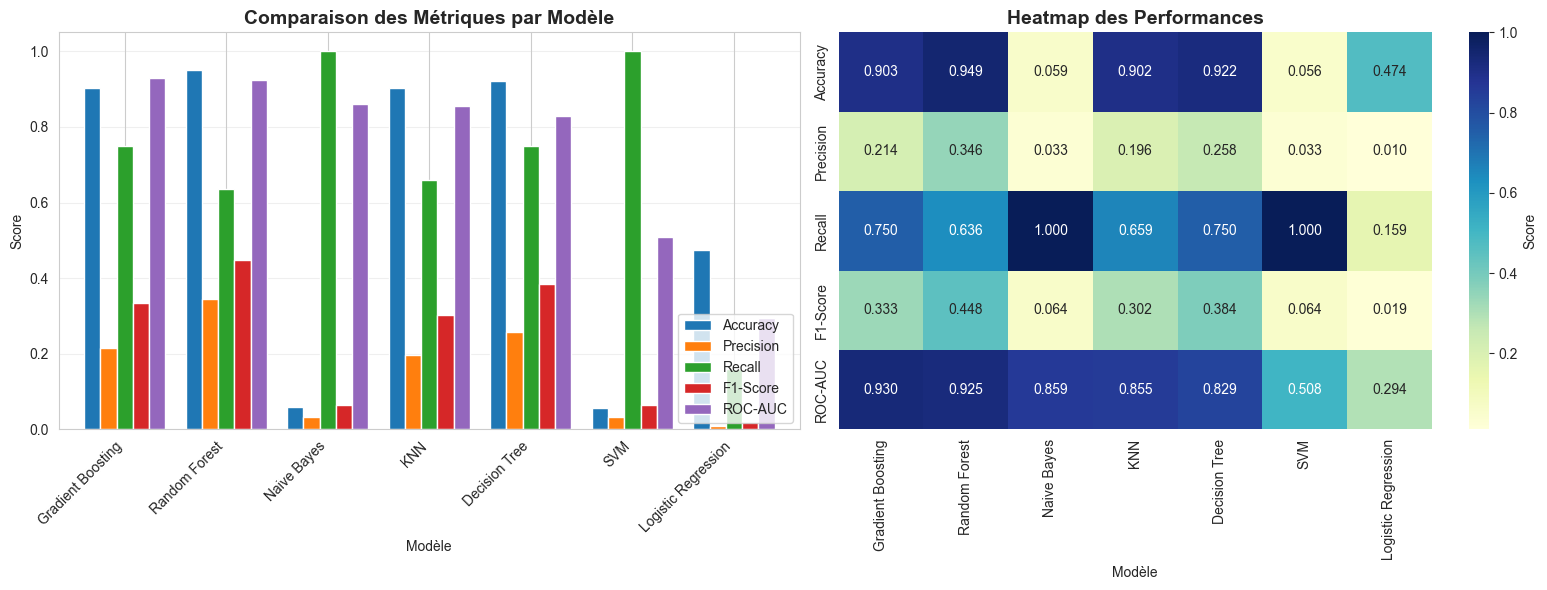


🏆 MEILLEUR MODÈLE: Gradient Boosting
   ROC-AUC: 0.9305
   Accuracy: 0.9032
   Precision: 0.2143
   Recall: 0.7500
   F1-Score: 0.3333

6. ANALYSE DÉTAILLÉE: Gradient Boosting
--------------------------------------------------------------------------------

📋 Rapport de Classification:

              precision    recall  f1-score   support

        Sain       0.99      0.91      0.95      1320
    Faillite       0.21      0.75      0.33        44

    accuracy                           0.90      1364
   macro avg       0.60      0.83      0.64      1364
weighted avg       0.97      0.90      0.93      1364



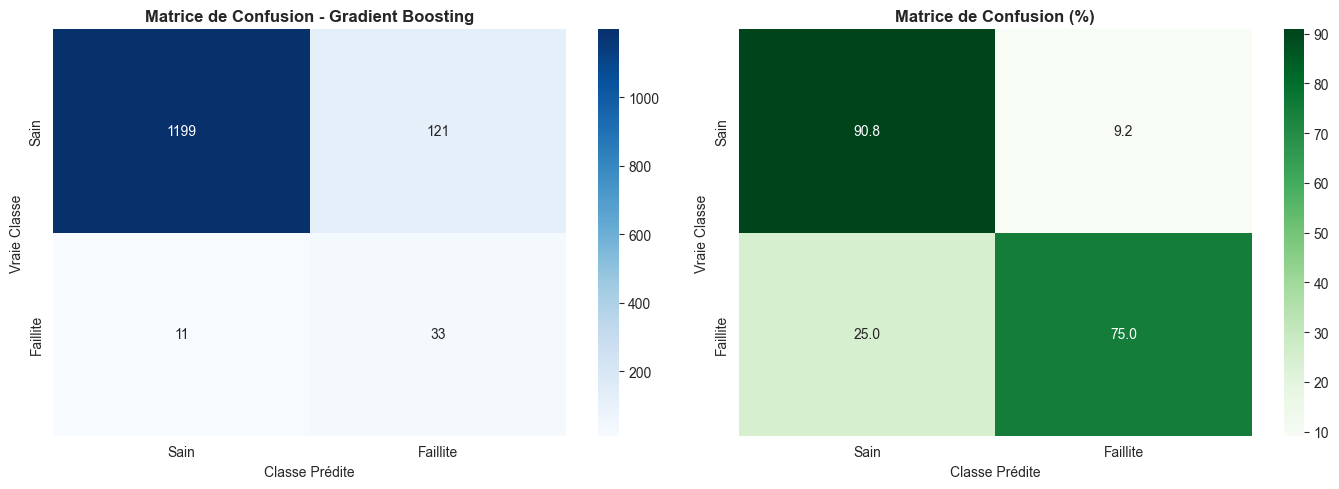


📊 Interprétation:
   Vrais Négatifs (TN): 1199 - Entreprises saines correctement identifiées
   Faux Positifs (FP): 121 - Entreprises saines prédites en faillite
   Faux Négatifs (FN): 11 - Faillites manquées (⚠️ CRITIQUE)
   Vrais Positifs (TP): 33 - Faillites correctement détectées

7. COURBES ROC ET PRECISION-RECALL
--------------------------------------------------------------------------------


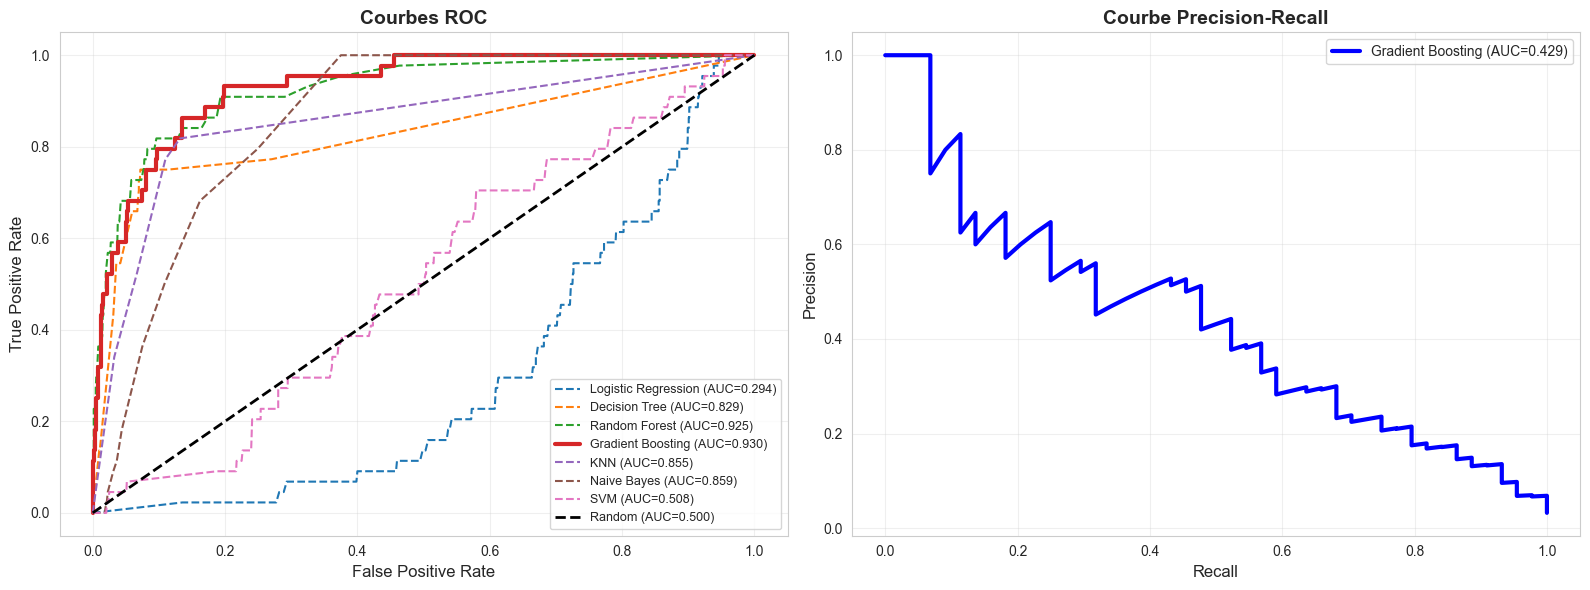

✅ Courbes sauvegardées

8. IMPORTANCE DES FEATURES
--------------------------------------------------------------------------------

📊 Top 15 features les plus importantes:

                                              Feature  Importance
0                                Borrowing dependency    0.465777
4             Persistent EPS in the Last Four Seasons    0.157533
8                          Total debt/Total net worth    0.106486
10               Continuous interest rate (after tax)    0.068185
15                Interest-bearing debt interest rate    0.037637
6                              Interest Expense Ratio    0.030628
7                  Degree of Financial Leverage (DFL)    0.027584
3                          Net Income to Total Assets    0.021419
14                            Net Value Per Share (B)    0.021229
2                  Net Income to Stockholder's Equity    0.015702
16                              Net Value Growth Rate    0.011639
5               Net profit before 

<Figure size 1200x800 with 0 Axes>

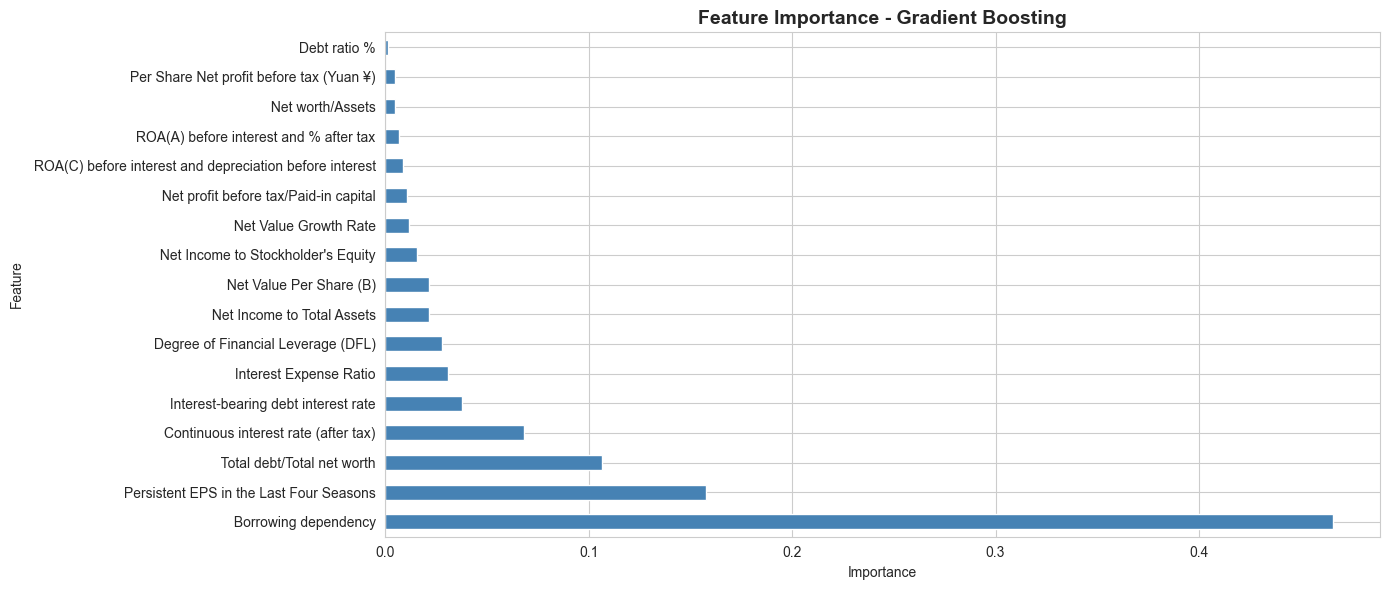


9. OPTIMISATION DU MEILLEUR MODÈLE
--------------------------------------------------------------------------------
⚠️ Grid Search non implémenté pour Gradient Boosting

10. SAUVEGARDE DU MODÈLE
--------------------------------------------------------------------------------
✅ Modèle sauvegardé: ../models/best_model.pkl
✅ Scaler disponible: ../data/cleaned/robust_scaler.pkl
✅ Noms des features sauvegardés
✅ Métriques sauvegardées

RÉSUMÉ DE LA MODÉLISATION

RÉSULTATS DE LA MODÉLISATION
Dataset: Taiwanese Bankruptcy Prediction
Date: 2026-01-13 10:17

DONNÉES:
--------
• Total observations: 6,819
• Features: 17
• Train/Test split: 80/20
• Méthode de rééquilibrage: SMOTE

MODÈLES TESTÉS: 7
--------------
  1. Logistic Regression
  2. Decision Tree
  3. Random Forest
  4. Gradient Boosting
  5. KNN
  6. Naive Bayes
  7. SVM

MEILLEUR MODÈLE: Gradient Boosting
----------------
• ROC-AUC: 0.9305
• Accuracy: 0.9032
• Precision: 0.2143
• Recall: 0.7500
• F1-Score: 0.3333

MATRICE DE CONFUSION

In [3]:
# ================================================================================
# NOTEBOOK 5: MODÉLISATION ET PRÉDICTION
# Dataset: Taiwanese Bankruptcy Prediction
# Fichier: notebooks/05_modeling.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_auc_score, roc_curve, precision_recall_curve,
    accuracy_score, precision_score, recall_score, f1_score,
    auc
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 80)
print("MODÉLISATION - DÉTECTION ANOMALIES FINANCIÈRES")
print("Dataset: Taiwanese Bankruptcy Prediction")
print("=" * 80)

# ================================================================================
# 1. CHARGEMENT DES DONNÉES
# ================================================================================

print("\n1. CHARGEMENT DES DONNÉES")
print("-" * 80)

# Charger les données (essayer d'abord avec features sélectionnées)
try:
    df = pd.read_csv('../data/cleaned/financial_data_selected_features.csv')
    print("✅ Données avec features sélectionnées chargées")
    data_type = "selected_features"
except FileNotFoundError:
    try:
        df = pd.read_csv('../data/cleaned/financial_data_pca.csv')
        print("✅ Données avec PCA chargées")
        data_type = "pca"
    except FileNotFoundError:
        df = pd.read_csv('../data/cleaned/financial_data_cleaned.csv')
        print("⚠️ Données nettoyées (toutes les features) chargées")
        data_type = "all_features"

print(f"Type de données: {data_type}")
print(f"Dimensions: {df.shape}")

# Séparer features et target
target_col = 'Bankrupt?'
X = df.drop(target_col, axis=1)
y = df[target_col]

print(f"\nFeatures: {X.shape[1]}")
print(f"Observations: {len(X):,}")

# Distribution de la cible
print(f"\n📊 Distribution de la variable cible:")
print(y.value_counts())
print(f"\nProportions:")
print(y.value_counts(normalize=True).round(4))

imbalance_ratio = y.value_counts()[0] / y.value_counts()[1]
print(f"\nRatio de déséquilibre: {imbalance_ratio:.2f}:1")

# ================================================================================
# 2. SÉPARATION TRAIN/TEST
# ================================================================================

print("\n2. SÉPARATION TRAIN/TEST")
print("-" * 80)

# Split stratifié pour conserver les proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Données séparées:")
print(f"   Train: {X_train.shape[0]:,} observations ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test:  {X_test.shape[0]:,} observations ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n   Distribution Train: {dict(y_train.value_counts())}")
print(f"   Distribution Test:  {dict(y_test.value_counts())}")

# ================================================================================
# 3. TRAITEMENT DU DÉSÉQUILIBRE DES CLASSES
# ================================================================================

print("\n3. TRAITEMENT DU DÉSÉQUILIBRE DES CLASSES")
print("-" * 80)

print(f"\n📊 Dataset original (déséquilibré):")
print(f"   Classe 0 (Sain): {(y_train == 0).sum():,}")
print(f"   Classe 1 (Faillite): {(y_train == 1).sum():,}")
print(f"   Ratio: {(y_train == 0).sum() / (y_train == 1).sum():.2f}:1")

# Méthode 1: SMOTE (Over-sampling)
print(f"\n🔧 Application de SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"   Après SMOTE:")
print(f"   Classe 0: {(y_train_smote == 0).sum():,}")
print(f"   Classe 1: {(y_train_smote == 1).sum():,}")

# Méthode 2: Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print(f"\n   Après Under-sampling:")
print(f"   Classe 0: {(y_train_under == 0).sum():,}")
print(f"   Classe 1: {(y_train_under == 1).sum():,}")

# Méthode 3: Combinaison SMOTE + Tomek
smotetomek = SMOTETomek(random_state=42)
X_train_combined, y_train_combined = smotetomek.fit_resample(X_train, y_train)

print(f"\n   Après SMOTE + Tomek:")
print(f"   Classe 0: {(y_train_combined == 0).sum():,}")
print(f"   Classe 1: {(y_train_combined == 1).sum():,}")

# Visualisation
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

datasets = [
    (y_train, "Original"),
    (y_train_smote, "SMOTE"),
    (y_train_under, "Under-sampling"),
    (y_train_combined, "SMOTE+Tomek")
]

for idx, (data, title) in enumerate(datasets):
    counts = data.value_counts()
    axes[idx].bar(['Sain', 'Faillite'], counts.values, color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Nombre')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Ajouter les valeurs
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.suptitle('Comparaison des Méthodes de Rééquilibrage', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/cleaned/class_balancing.png', dpi=300, bbox_inches='tight')
plt.show()

# Utiliser SMOTE pour la suite (meilleure pratique)
X_train_balanced = X_train_smote
y_train_balanced = y_train_smote
print(f"\n✅ Utilisation de SMOTE pour l'entraînement")

# ================================================================================
# 4. ENTRAÎNEMENT DES MODÈLES
# ================================================================================

print("\n4. ENTRAÎNEMENT DES MODÈLES")
print("-" * 80)

# Définir les modèles à tester
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42)
}

# Dictionnaire pour stocker les résultats
results = {}
trained_models = {}

print("\n🔄 Entraînement en cours...\n")

for name, model in models.items():
    print(f"   Entraînement: {name}...", end=' ')
    
    # Entraîner
    model.fit(X_train_balanced, y_train_balanced)
    trained_models[name] = model
    
    # Prédire sur le test
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculer les métriques
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'y_pred': y_pred,
        'y_proba': y_proba
    }
    
    print(f"✓ (AUC: {results[name]['roc_auc']:.4f})")

print("\n✅ Tous les modèles entraînés avec succès!")

# ================================================================================
# 5. COMPARAISON DES MODÈLES
# ================================================================================

print("\n5. COMPARAISON DES PERFORMANCES")
print("-" * 80)

# Créer DataFrame de résultats
results_df = pd.DataFrame({
    name: {
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score'],
        'ROC-AUC': metrics['roc_auc']
    }
    for name, metrics in results.items()
}).T

# Trier par ROC-AUC
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("\n📊 Performances des modèles (trié par ROC-AUC):\n")
print(results_df.round(4))

# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot des métriques
results_df.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Comparaison des Métriques par Modèle', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Modèle')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Heatmap
sns.heatmap(results_df.T, annot=True, fmt='.3f', cmap='YlGnBu', 
            ax=axes[1], cbar_kws={'label': 'Score'})
axes[1].set_title('Heatmap des Performances', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Modèle')

plt.tight_layout()
plt.savefig('../data/cleaned/models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Identifier le meilleur modèle
best_model_name = results_df['ROC-AUC'].idxmax()
best_model = trained_models[best_model_name]

print(f"\n🏆 MEILLEUR MODÈLE: {best_model_name}")
print(f"   ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")
print(f"   Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   Precision: {results[best_model_name]['precision']:.4f}")
print(f"   Recall: {results[best_model_name]['recall']:.4f}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.4f}")

# ================================================================================
# 6. ANALYSE DÉTAILLÉE DU MEILLEUR MODÈLE
# ================================================================================

print(f"\n6. ANALYSE DÉTAILLÉE: {best_model_name}")
print("-" * 80)

y_pred_best = results[best_model_name]['y_pred']
y_proba_best = results[best_model_name]['y_proba']

# Classification Report
print(f"\n📋 Rapport de Classification:\n")
print(classification_report(y_test, y_pred_best, 
                          target_names=['Sain', 'Faillite']))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matrice de confusion - Nombres
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Sain', 'Faillite'],
            yticklabels=['Sain', 'Faillite'])
axes[0].set_title(f'Matrice de Confusion - {best_model_name}', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Vraie Classe')
axes[0].set_xlabel('Classe Prédite')

# Matrice de confusion - Pourcentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Greens', ax=axes[1],
            xticklabels=['Sain', 'Faillite'],
            yticklabels=['Sain', 'Faillite'])
axes[1].set_title('Matrice de Confusion (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Vraie Classe')
axes[1].set_xlabel('Classe Prédite')

plt.tight_layout()
plt.savefig('../data/cleaned/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Interprétation:")
print(f"   Vrais Négatifs (TN): {cm[0,0]} - Entreprises saines correctement identifiées")
print(f"   Faux Positifs (FP): {cm[0,1]} - Entreprises saines prédites en faillite")
print(f"   Faux Négatifs (FN): {cm[1,0]} - Faillites manquées (⚠️ CRITIQUE)")
print(f"   Vrais Positifs (TP): {cm[1,1]} - Faillites correctement détectées")

# ================================================================================
# 7. COURBES ROC ET PRECISION-RECALL
# ================================================================================

print("\n7. COURBES ROC ET PRECISION-RECALL")
print("-" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Courbe ROC pour tous les modèles
for name in results.keys():
    y_proba = results[name]['y_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = results[name]['roc_auc']
    
    linestyle = '-' if name == best_model_name else '--'
    linewidth = 3 if name == best_model_name else 1.5
    
    axes[0].plot(fpr, tpr, linestyle=linestyle, linewidth=linewidth,
                label=f'{name} (AUC={roc_auc:.3f})')

axes[0].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC=0.500)')
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('Courbes ROC', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Courbe Precision-Recall pour le meilleur modèle
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_best)
pr_auc = auc(recall, precision)

axes[1].plot(recall, precision, 'b-', linewidth=3, 
            label=f'{best_model_name} (AUC={pr_auc:.3f})')
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Courbe Precision-Recall', fontsize=14, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/cleaned/roc_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Courbes sauvegardées")

# ================================================================================
# 8. FEATURE IMPORTANCE (si disponible)
# ================================================================================

print("\n8. IMPORTANCE DES FEATURES")
print("-" * 80)

if hasattr(best_model, 'feature_importances_'):
    # Pour les modèles tree-based
    importances = best_model.feature_importances_
    feature_names = X.columns
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n📊 Top 15 features les plus importantes:\n")
    print(importance_df.head(15))
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    importance_df.head(20).plot(x='Feature', y='Importance', kind='barh', 
                                color='steelblue', legend=False)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('../data/cleaned/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # Pour les modèles linéaires
    coefficients = np.abs(best_model.coef_[0])
    feature_names = X.columns
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values('Coefficient', ascending=False)
    
    print(f"\n📊 Top 15 coefficients:\n")
    print(coef_df.head(15))

# ================================================================================
# 9. OPTIMISATION DU MEILLEUR MODÈLE (GRID SEARCH)
# ================================================================================

print("\n9. OPTIMISATION DU MEILLEUR MODÈLE")
print("-" * 80)

if best_model_name == 'Random Forest':
    print("\n🔍 Grid Search pour Random Forest...")
    
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5]
    }
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    print(f"\n✅ Meilleurs paramètres: {grid_search.best_params_}")
    print(f"   Meilleur score CV: {grid_search.best_score_:.4f}")
    
    # Utiliser le modèle optimisé
    best_model_optimized = grid_search.best_estimator_
    y_pred_opt = best_model_optimized.predict(X_test)
    y_proba_opt = best_model_optimized.predict_proba(X_test)[:, 1]
    
    roc_auc_opt = roc_auc_score(y_test, y_proba_opt)
    print(f"   ROC-AUC sur test: {roc_auc_opt:.4f}")
    
    if roc_auc_opt > results[best_model_name]['roc_auc']:
        print(f"\n🎉 Amélioration de {roc_auc_opt - results[best_model_name]['roc_auc']:.4f}!")
        best_model = best_model_optimized
    
else:
    print(f"⚠️ Grid Search non implémenté pour {best_model_name}")

# ================================================================================
# 10. SAUVEGARDE DU MODÈLE
# ================================================================================

print("\n10. SAUVEGARDE DU MODÈLE")
print("-" * 80)

# Sauvegarder le meilleur modèle
model_filename = '../models/best_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)
print(f"✅ Modèle sauvegardé: {model_filename}")

# Sauvegarder aussi le scaler (si utilisé)
try:
    scaler_path = '../data/cleaned/robust_scaler.pkl'
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    print(f"✅ Scaler disponible: {scaler_path}")
except:
    print(f"⚠️ Scaler non trouvé")

# Sauvegarder les noms de features
feature_names = list(X.columns)
with open('../models/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✅ Noms des features sauvegardés")

# Sauvegarder les métriques
metrics_df = pd.DataFrame({
    'Model': [best_model_name],
    'Accuracy': [results[best_model_name]['accuracy']],
    'Precision': [results[best_model_name]['precision']],
    'Recall': [results[best_model_name]['recall']],
    'F1-Score': [results[best_model_name]['f1_score']],
    'ROC-AUC': [results[best_model_name]['roc_auc']]
})
metrics_df.to_csv('../models/model_metrics.csv', index=False)
print(f"✅ Métriques sauvegardées")

# ================================================================================
# 11. RÉSUMÉ FINAL
# ================================================================================

print("\n" + "=" * 80)
print("RÉSUMÉ DE LA MODÉLISATION")
print("=" * 80)

summary = f"""
RÉSULTATS DE LA MODÉLISATION
=============================
Dataset: Taiwanese Bankruptcy Prediction
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}

DONNÉES:
--------
• Total observations: {len(X):,}
• Features: {X.shape[1]}
• Train/Test split: 80/20
• Méthode de rééquilibrage: SMOTE

MODÈLES TESTÉS: {len(models)}
--------------
{chr(10).join(f"  {i+1}. {name}" for i, name in enumerate(models.keys()))}

MEILLEUR MODÈLE: {best_model_name}
----------------
• ROC-AUC: {results[best_model_name]['roc_auc']:.4f}
• Accuracy: {results[best_model_name]['accuracy']:.4f}
• Precision: {results[best_model_name]['precision']:.4f}
• Recall: {results[best_model_name]['recall']:.4f}
• F1-Score: {results[best_model_name]['f1_score']:.4f}

MATRICE DE CONFUSION:
--------------------
                Prédit: Sain    Prédit: Faillite
Réel: Sain          {cm[0,0]:6}           {cm[0,1]:6}
Réel: Faillite      {cm[1,0]:6}           {cm[1,1]:6}

INTERPRÉTATION:
--------------
• {cm[1,1]} faillites correctement détectées
• {cm[1,0]} faillites manquées (Faux Négatifs)
• {cm[0,1]} fausses alertes (Faux Positifs)
• Taux de détection: {cm[1,1]/(cm[1,0]+cm[1,1])*100:.1f}%

FICHIERS GÉNÉRÉS:
----------------
✓ ../models/best_model.pkl
✓ ../models/feature_names.pkl
✓ ../models/model_metrics.csv
✓ Graphiques de visualisation (PNG)

PERFORMANCES COMPARÉES:
----------------------
{results_df.to_string()}

RECOMMANDATIONS:
---------------
1. Le modèle {best_model_name} est recommandé pour la production
2. ROC-AUC de {results[best_model_name]['roc_auc']:.4f} indique {'excellentes' if results[best_model_name]['roc_auc'] > 0.9 else 'bonnes'} performances
3. Recall de {results[best_model_name]['recall']:.4f} → {cm[1,1]/(cm[1,0]+cm[1,1])*100:.1f}% des faillites détectées
4. Utiliser le modèle sauvegardé dans l'application Streamlit

COÛT DES ERREURS:
----------------
• Faux Négatif (manquer une faillite): COÛT ÉLEVÉ ⚠️
• Faux Positif (fausse alerte): Coût modéré
→ Privilégier le Recall (sensibilité) pour minimiser les faillites manquées

PROCHAINE ÉTAPE:
---------------
→ Développer l'application Streamlit (app/app.py)
→ Intégrer le modèle sauvegardé pour les prédictions en temps réel
"""

print(summary)

# Sauvegarder le rapport
with open('../models/modeling_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✅ Modélisation terminée avec succès!")
print("📄 Rapport sauvegardé: ../models/modeling_report.txt")
print("\n🎉 PROJET PRESQUE TERMINÉ!")
print("   Prochaine étape: Développer l'application web (app/app.py)")
print("=" * 80)